Building prefix dict from C:\Users\user\斷詞與文字雲\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.u26dde8eadd1d88361d80552aac827a44.cache


標題:巴黎- 维基百科，自由的百科全书https://zh.wikipedia.org › zh-tw › 巴黎
網址:/url?q=https://zh.wikipedia.org/zh-tw/%25E5%25B7%25B4%25E9%25BB%258E&sa=U&ved=2ahUKEwiAjOjMt8PlAhUDEqYKHTMaCj0QFjANegQICRAB&usg=AOvVaw18awHFu4IWIO8OQxjuCOoy
標題:【2019法國自由行】巴黎行程規劃攻略：行前準備、巴黎好玩旅遊景點 ...https://tw.bring-you.info › paris-travel-tips
網址:/url?q=https://tw.bring-you.info/paris-travel-tips&sa=U&ved=2ahUKEwiAjOjMt8PlAhUDEqYKHTMaCj0QFjAOegQIBRAB&usg=AOvVaw3zAd6XuTHc2h_Zu90KAfJP
標題:巴黎必玩旅遊景點與自由行一日遊行程、景點門票、交通票券- KLOOK ...https://www.klook.com › zh-TW › city › 107-paris
網址:/url?q=https://www.klook.com/zh-TW/city/107-paris/&sa=U&ved=2ahUKEwiAjOjMt8PlAhUDEqYKHTMaCj0QFjAPegQIBhAB&usg=AOvVaw25FAL7Vb8fBMkBpIfwTuTL
標題:【巴黎自由行】2019法國巴黎旅遊規劃自助全攻略，必玩景點＆美食 ...https://mimihan.tw › paris-travel
網址:/url?q=https://mimihan.tw/paris-travel/&sa=U&ved=2ahUKEwiAjOjMt8PlAhUDEqYKHTMaCj0QFjAQegQIChAB&usg=AOvVaw36xyc3DSDfEKuFa0qxgaDt
標題:法國巴黎自由行｜巴黎必去15大景點、交通、住宿攻略懶人包！艾菲爾 ...https://foodieteller.com › paris-package
網址:/url?q=https://foodieteller.com/pari

Loading model cost 1.027 seconds.
Prefix dict has been built succesfully.


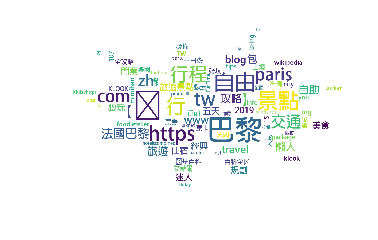

In [6]:
import requests
from bs4 import BeautifulSoup

google_url = 'https://www.google.com.tw/search'
my_params = {'q' : '巴黎'}
r = requests.get(google_url, params = my_params)

if r.status_code == requests.codes.ok:
    soup = BeautifulSoup(r.text, 'html.parser')
    items = soup.select('div.kCrYT > a[href^="/url"]')
    
    for i in items:
        print("標題:" + i.text)
        print("網址:" + i.get('href'))

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter

#text = open('news1.txt', "r",encoding="utf-8").read()  #讀文字資料\\

#讀取google資料
text = '天氣'
for i in items:
    text = text + i.text
print( text)
 
jieba.set_dictionary('dictionary/dict.txt.big.txt')
with open('dictionary/stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
#with open('dictionary/stopWord_cloudmod.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
    stops = f.read().split('\n')   
terms = []  #儲存字詞
for t in jieba.cut(text, cut_all=False):  #拆解句子為字詞
    if t not in stops:  #不是停用詞
        terms.append(t)
diction = Counter(terms)
# 可列印詞的統計數量
#print(diction)

font = "C:\\Windows\\Fonts\\AdobeFanHeitiStd-Bold.otf"  #設定字型(宋體)
#wordcloud = WordCloud(font_path="C:\\Windows\\Fonts\\simsun.ttc")

mask = np.array(Image.open("star1.png"))  #設定文字雲形狀 
#wordcloud = WordCloud(font_path=font) 
wordcloud = WordCloud(background_color="white",mask=mask, font_path=font)  #背景顏色預設黑色,改為白色,字體為宋體
wordcloud.generate_from_frequencies(diction)  #產生文字雲

#產生圖片
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("news_Wordcloud.png")  #存檔